{5: [71.923829]}
{5: [71.923829, 47.464752]}
{5: [71.923829, 47.464752, 40.81825]}
{5: [71.923829, 47.464752, 40.81825], 10: [44.07353]}
{5: [71.923829, 47.464752, 40.81825], 10: [44.07353, 91.939602]}
{5: [71.923829, 47.464752, 40.81825], 10: [44.07353, 91.939602, 73.21384800000001]}
{5: [71.923829, 47.464752, 40.81825], 10: [44.07353, 91.939602, 73.21384800000001], 15: [160.24589100000003]}
{5: [71.923829, 47.464752, 40.81825], 10: [44.07353, 91.939602, 73.21384800000001], 15: [160.24589100000003, 162.993701]}
{5: [71.923829, 47.464752, 40.81825], 10: [44.07353, 91.939602, 73.21384800000001], 15: [160.24589100000003, 162.993701, 101.516812]}
{5: [71.923829, 47.464752, 40.81825], 10: [44.07353, 91.939602, 73.21384800000001], 15: [160.24589100000003, 162.993701, 101.516812], 20: [187.350918]}
{5: [71.923829, 47.464752, 40.81825], 10: [44.07353, 91.939602, 73.21384800000001], 15: [160.24589100000003, 162.993701, 101.516812], 20: [187.350918, 238.555849]}
{5: [71.923829, 47.464752, 40.81

Text(0,0.5,'Completion Time (s)')

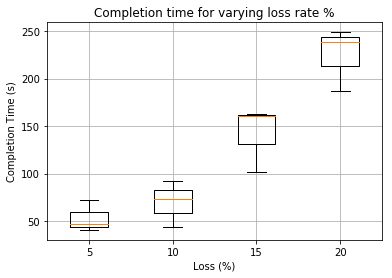

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import os
import subprocess
import sys
import glob as glob


#filenames = glob.glob('./coap_traces/CoAP/coaploss*.pcapng')
#print(filenames)


#Grouping trace files with same loss rate into a dictionary
dict_files=dict()
for i in range(5,25,5):
    for j in range(1,4):
        filename=glob.glob('./coap_traces/CoAP/coaploss'+str(i)+'-'+str(j)+'.pcapng')
        #print(filename)
        #print(type(filename))
        if i in dict_files.keys():
            dict_files[i].append(filename[0])
        else:
            dict_files[i] = []
            dict_files[i].append(filename[0])
        
#print(dict_files)
#Writing trace files to a dataframe and computing completion time
comp_time_dict=dict()
#for i in dict_files.keys():
for i,j in dict_files.items():
    for k in range(0,3):
        #print(j[k])
        output= subprocess.Popen("tshark -r "+j[k]+" -Y 'coap.type==0 or coap.type==2'| awk '{print $1,$2,$3,$5,$6,$8}' > coap_packets", stdout=subprocess.PIPE, shell=True)
        output_pid = output.pid
        os.waitpid(output_pid, 0)
        file = open('coap_packets', 'r+')
        X_temp=pd.read_table(file,sep=" ",names=['pkt_id','timestamp','from','to','protocol','msg_type'])
        #print(X_temp)

        for row in X_temp.itertuples():
            if(row.Index==0 and row.msg_type=='CON,'):
                conn_start_time=row.timestamp
            if (row.msg_type=='ACK,'):
                conn_stop_time=row.timestamp
        #print("start",conn_start_time)
        #print("stop",conn_stop_time)
        comp_time=conn_stop_time-conn_start_time
        #print("i = ",i)
        #print("j = ",j)
        #print(type(comp_time))
        #print(comp_time)
        if i in comp_time_dict.keys():
            comp_time_dict[i].append(comp_time)
            #print("if")
        else:
            comp_time_dict[i]=[]
            comp_time_dict[i].append(comp_time)
            #print("else")
        print(comp_time_dict)              
            
pl.figure()
pl.title('Completion time for varying loss rate %')
pl.boxplot(comp_time_dict.values(),labels=dict_files.keys())
pl.grid()
pl.xlabel('Loss (%)')
pl.ylabel('Completion Time (s)')    
    
